## Dataset preparation
#### basic metrics calculation

In [16]:
# imports

import pandas as pd
import numpy as np
import networkx as nx
from random import sample
import time
import matplotlib.pyplot as plt
import pickle

In [45]:
# load dataset (reddit social graph)
dataset = 'HU_edges.csv'

data = pd.read_csv(dataset, header = 0, sep = ',') 
data = data[[data.columns[0], data.columns[1]]]
data.head()

,node_1,node_2
0,0,24208
1,0,24445
2,0,18055
3,0,26575
4,0,12596


In [47]:
# Make networkx graph object

graph = nx.from_pandas_edgelist(data, data.columns[0], data.columns[1])

In [48]:
# graph properties

print('Number of nodes: ', graph.number_of_nodes())
print('Number of edges: ', graph.number_of_edges())

Number of nodes:  47538
Number of edges:  222887


In [49]:
# Giant component
Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
print('Number of largest connected components: ', len(Gcc))

giant = graph.subgraph(Gcc[0])
print('Number of nodes in giant component: ', giant.number_of_nodes())

Number of largest connected components:  1
Number of nodes in giant component:  47538


In [36]:
print('Average Clustering coefficient: ', nx.average_clustering(graph))

Average Clustering coefficient:  0.11618722661249824


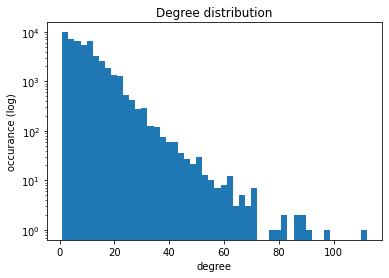

In [50]:
degrees = [giant.degree(n) for n in giant.nodes()]
plt.hist(degrees, bins = 50)
plt.yscale('log')
plt.title('Degree distribution')
plt.ylabel('occurance (log)')
plt.xlabel('degree')
plt.show()

In [44]:
# save data for later reuse (plotting)
with open('deezer_degrees.pickle', 'wb') as handle:
    pickle.dump(degrees, handle)

### Input preparation for Rigel

In [7]:
# input preparation for Rigel
np.random.seed(1337)
nodes = list(giant.nodes())
N = len(nodes)
landmark_cnt = 100
landmarks = sample(nodes, landmark_cnt)  #here a landmark selection strategy could be introduced
landmark_indices = [nodes.index(lm) for lm in landmarks]
distance_matrix = {j:dict() for j in landmarks}
#distance_matrix = dict()
start_time = time.time()
for i in landmarks:
    #distance_matrix[i] = dict()
    #print('landmark ', i, ' calculating...')
    path_lengths = nx.single_source_shortest_path_length(giant, i)
    for j in nodes:
        distance_matrix[i][j] = int(path_lengths[j])
    #print("landmark ", i," finished in %s seconds " % (time.time() - start_time))
print("Landmark BFSs finished in %s seconds " % (time.time() - start_time))

Landmark BFSs finished in 54.30251455307007 seconds 


In [8]:
with open('l_deezer.txt', 'w') as f:
    for i in distance_matrix.keys():
        nested_list = [str(j) for j in list(distance_matrix[i].values())]
        f.writelines('\t'.join(nested_list) + '\n')
f.close()

In [9]:
with open('r_deezer.txt', 'w') as f:
    for node in landmark_indices:
        f.write('%s\n' % node)
f.close()

In [10]:
with open('0_deezer.ord', 'w') as f:
    for i in range(N):
        if not i in landmark_indices:
            f.write('%s\n' % i)
f.close()

In [39]:
len(nodes)

47538